In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset_1 = pd.read_csv("C:/Senthan/Python/pandas/data/Hackathon Dataset/data_2022_2023.csv")
print(dataset_1.columns)
# dataset_1.dropna()

Index(['LastName', 'FirstName', 'Gender', 'Country', 'Date', 'Competition',
       'Round', 'Location', 'Apparatus', 'Rank', 'D_Score', 'E_Score',
       'Penalty', 'Score'],
      dtype='object')


In [124]:
dataset_1["full_name"] = dataset_1["FirstName"]+" "+dataset_1["LastName"]


In [131]:

names = []
for name in dataset_1["full_name"]:
    if name not in names:
        names.append(name)
names_vs_average_score_data = pd.DataFrame([],
columns=[])
names_vs_average_score_data["names"] = names
# print(names_vs_average_score_data["names"])


avg_rank_per_country=dataset_1.groupby(by ="Country" )["Rank"].mean()
avg_rank_per_country=avg_rank_per_country.to_frame()
avg_rank_per_country=avg_rank_per_country.sort_values("Rank")
lowest_avg_rank_per_country = avg_rank_per_country.nsmallest(20, "Rank")
highest_avg_rank_per_country = avg_rank_per_country.nlargest(20, "Rank")
highest_avg_rank_per_country=highest_avg_rank_per_country.sort_values("Rank")


C:\Users\senth\AppData\Local\Temp\ipykernel_34968\39056706.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.relplot(data=avg_rank_per_country,x=index, y="Rank",palette="muted")


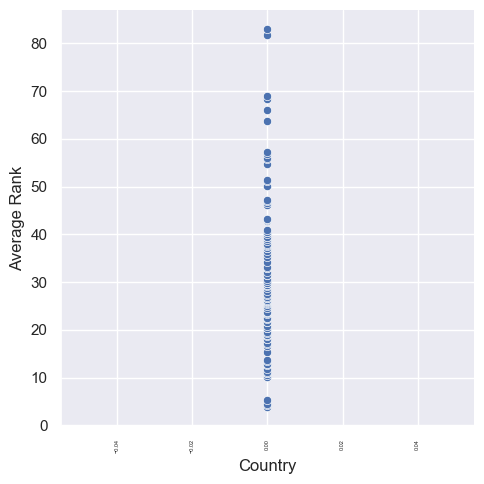

In [143]:
top_countries_by_gpa = ["USA","CHN","GER","IND","JPN","ENG","FRA","ITA","CAN","BRA","RUS","ESP","GBR"]


sns.set_theme(style = "darkgrid")

p = sns.relplot(data=avg_rank_per_country,x=index, y="Rank",palette="muted")
p.set_axis_labels(x_var="Country", y_var= "Average Rank")
plt.xticks(rotation = 90, fontsize = 4)
plt.show()

C:\Users\senth\AppData\Local\Temp\ipykernel_34968\1338829226.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.relplot(data=lowest_avg_rank_per_country,x="Country", y="Rank",palette="muted")


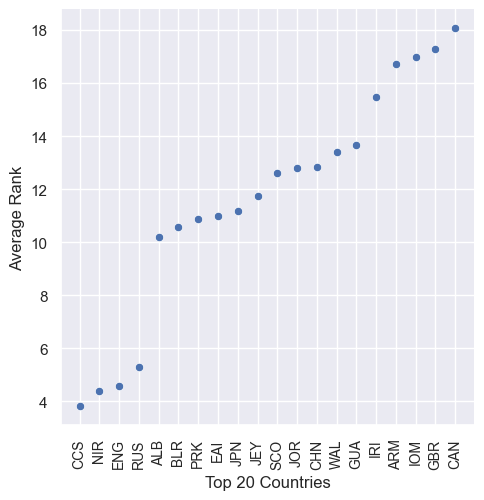

In [127]:
sns.set_theme(style = "darkgrid")

p = sns.relplot(data=lowest_avg_rank_per_country,x="Country", y="Rank",palette="muted")
p.set_axis_labels(x_var="Top 20 Countries", y_var= "Average Rank")
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

C:\Users\senth\AppData\Local\Temp\ipykernel_34968\663472181.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.relplot(data=highest_avg_rank_per_country,x="Country", y="Rank",palette="muted")


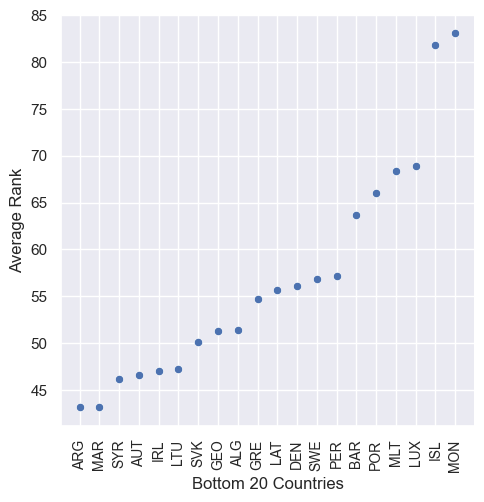

In [128]:
sns.set_theme(style = "darkgrid")

p = sns.relplot(data=highest_avg_rank_per_country,x="Country", y="Rank",palette="muted")
p.set_axis_labels(x_var="Bottom 20 Countries", y_var= "Average Rank")
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [145]:
dataset_1_countries = dataset_1.drop_duplicates(subset="full_name").reset_index()
# print(dataset_1_countries)
people_per_country=dataset_1_countries.groupby(by="Country").count()["index"].to_frame()
print(people_per_country)
people_per_country.rename(columns={'index': 'People'}, inplace=True)
print(people_per_country)

         index
Country       
ALB          1
ALG         14
ARG         22
ARM          7
ARU          1
...        ...
USA        222
UZB         15
VEN         18
VIE         17
WAL          3

[105 rows x 1 columns]
         People
Country        
ALB           1
ALG          14
ARG          22
ARM           7
ARU           1
...         ...
USA         222
UZB          15
VEN          18
VIE          17
WAL           3

[105 rows x 1 columns]


C:\Users\senth\AppData\Local\Temp\ipykernel_34968\4056635639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(data=people_per_country,x="Country", y="People",palette="muted")


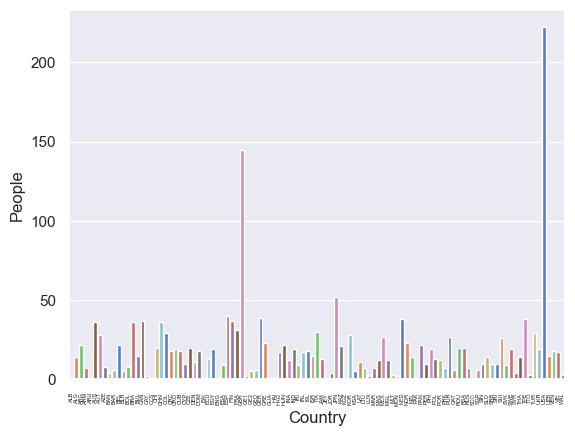

In [146]:
sns.set_theme(style = "darkgrid")

p = sns.barplot(data=people_per_country,x="Country", y="People",palette="muted")
# p.set_axis_labels(x_var="Country", y_var= "Number of People")
plt.xticks(rotation = 90, fontsize = 4)
plt.show()